In [1]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print(f"tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

2023-04-29 13:29:01.524510: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 13:29:02.106013: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


tensorflow version: 2.12.0
Keras version: 2.12.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-04-29 13:29:05.774816: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-29 13:29:05.786111: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['acc'])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20


2023-04-29 13:29:05.935051: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 1s 19ms/step - loss: 0.5583 - acc: 0.7590 - val_loss: 0.4417 - val_acc: 0.8254
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3509 - acc: 0.8871 - val_loss: 0.3372 - val_acc: 0.8783
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2629 - acc: 0.9141 - val_loss: 0.2921 - val_acc: 0.8908
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2125 - acc: 0.9281 - val_loss: 0.2790 - val_acc: 0.8919
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1765 - acc: 0.9425 - val_loss: 0.2933 - val_acc: 0.8835
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1505 - acc: 0.9506 - val_loss: 0.2792 - val_acc: 0.8886
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1300 - acc: 0.9585 - val_loss: 0.2993 - val_acc: 0.8825
Epoch 8/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1124 - acc: 0.9661 - val_l

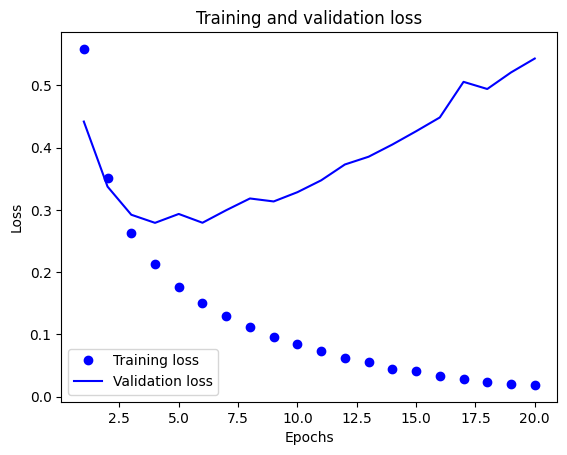

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: name 'history_dict' is not defined

<Figure size 640x480 with 0 Axes>

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


2023-04-29 13:29:47.025255: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.8070
Epoch 2/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2947 - accuracy: 0.8978
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.9176
Epoch 4/4
188/782 [======>.......................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8873

2023-04-29 13:29:48.778697: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 0s 529us/step - loss: 0.2810 - accuracy: 0.8870


In [15]:
results

[0.2809707522392273, 0.8869600296020508]

In [16]:
model.predict(x_test)

223/782 [=======>......................] - ETA: 0s

2023-04-29 13:29:58.988891: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 0s 450us/step


array([[0.2262585 ],
       [0.99926966],
       [0.83080405],
       ...,
       [0.08631703],
       [0.08397249],
       [0.39718133]], dtype=float32)

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4


2023-04-29 13:30:03.393060: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 [==============================] - 1s 4ms/step - loss: 0.5448 - accuracy: 0.7540
Epoch 2/4
49/49 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.8970
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2296 - accuracy: 0.9180
Epoch 4/4
782/782 [==============================] - 0s 534us/step - loss: 0.3068 - accuracy: 0.8785


[0.30678147077560425, 0.8784800171852112]

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 4ms/step - loss: 0.4507 - accuracy: 0.8158
Epoch 2/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2651 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2081 - accuracy: 0.9247
Epoch 4/4
782/782 [==============================] - 0s 529us/step - loss: 0.3088 - accuracy: 0.8752


[0.30877891182899475, 0.8751999735832214]